# Seismic-Style Wave Simulation

In this notebook, I simulate a short pulse with an echo to mimic a simple seismic reflection.  
We’ll explore how the reflected wave appears in the time and frequency domains.


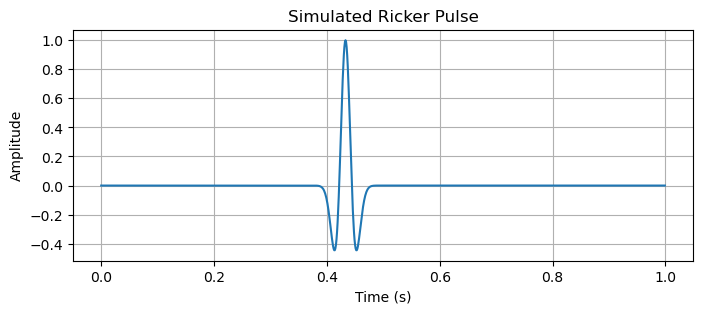

In [2]:
#Simulating a Ricker (Mexican hat) wavelet [A classic pulse shape wave in Geophysics]
import numpy as np
import matplotlib.pyplot as plt

# Sampling setup
fs = 1000  # Hz
duration = 1.0  # seconds
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# Function to create a Ricker wavelet
def ricker(f, length, dt):
    t = np.arange(-length/2, (length/2), dt)
    y = (1 - 2*(np.pi**2)*(f**2)*(t**2)) * np.exp(-(np.pi**2)*(f**2)*(t**2))
    return t, y

# Create wavelet
ricker_freq = 20  # Hz
tw, wavelet = ricker(ricker_freq, 0.2, 1/fs)

# Insert into zero signal
signal = np.zeros_like(t)
center = len(t) // 3
signal[center:center+len(wavelet)] += wavelet

# Plot the Ricker pulse
plt.figure(figsize=(8, 3))
plt.plot(t, signal)
plt.title("Simulated Ricker Pulse")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


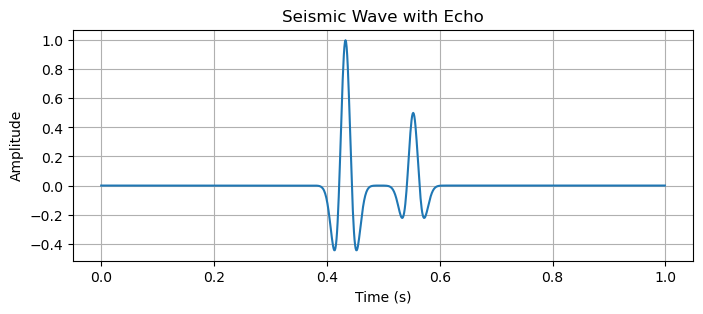

In [4]:
#Adding an lower amplitude copy to add a reflection/echo
# Create echo: delay and scale
delay_samples = 120  # ~0.12 seconds
echo = np.zeros_like(signal)
echo[center + delay_samples : center + delay_samples + len(wavelet)] += 0.5 * wavelet

# Combine original + echo
seismic_signal = signal + echo

# Plot both
plt.figure(figsize=(8, 3))
plt.plot(t, seismic_signal)
plt.title("Seismic Wave with Echo")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


second bump is reflected one while first is original wave


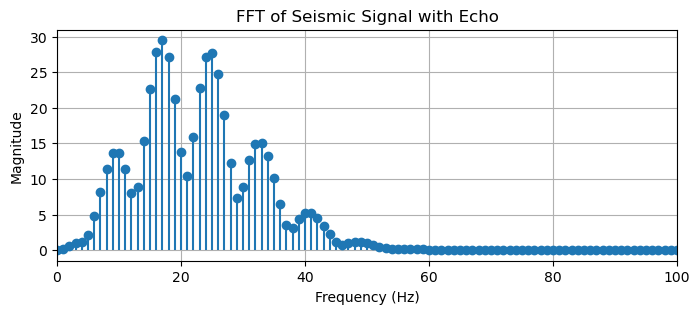

In [7]:
#**Frequency Analysis**
# FFT
fft_vals = np.fft.fft(seismic_signal)
fft_freqs = np.fft.fftfreq(len(fft_vals), 1/fs)
mask = fft_freqs >= 0

# Plot
plt.figure(figsize=(8, 3))
plt.stem(fft_freqs[mask], np.abs(fft_vals[mask]), basefmt=" ")
plt.title("FFT of Seismic Signal with Echo")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 100)
plt.grid(True)
plt.show()


## Insights

- The waveform shows a clear echo ~0.12s after the original.
- The FFT reveals a dominant frequency around 20 Hz—matching our Ricker wavelet.
- This mimics a basic seismic reflection, where echoes reveal subsurface structure.
